[13.900000000000006, 13.199999999999989, 14.700000000000003, 18.0, 16.400000000000002, 21.2, 2.83]
[-100, -86.1, -72.9, -58.2, -40.2, -23.8, -2.6, 23.0, 46.0, 77.0, 109.0, 139.0, 167.0, 194.0, 215.0, 231.0, 254.0]
[0, 10, 20, 30, 40, 50, 60, 80, 100, 125, 150, 175, 200, 225, 250, 275, 382]


Text(0, 0.5, 'Reaktivitaet[¢]')

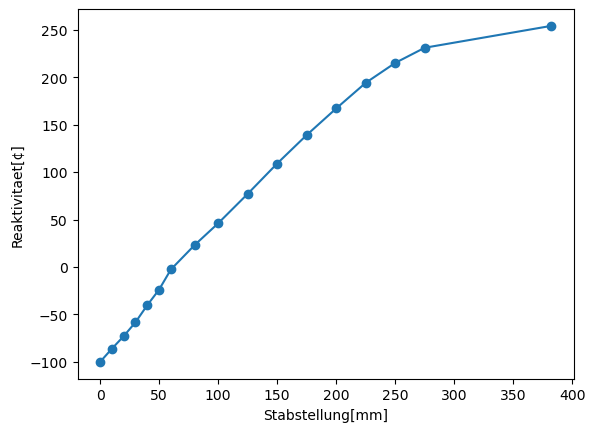

In [71]:
import numpy as np

stabstellung = [
80,
100,
125,
150,
175,
200,
225,
250,
275,
382
]
rho_abs=[-100,-86.1,-72.9,-58.2,-40.2,-23.8,-2.6]
delta_rho = []


stabstellung_low  = [0,10,20,30,40,50,60]
reaktivitaet = [

0.23,
0.23,
0.31,
0.32,
0.3,
0.28,
0.27,
0.21,
0.16,
0.23
]
for index,value in enumerate(rho_abs):
    if index == len(rho_abs )- 1:
        delta_rho.append(reaktivitaet[0] - rho_abs[index])
        break
    else:
        delta_rho.append(rho_abs[index + 1]  - rho_abs[index])

reaktivitaet = [100 * i for i in reaktivitaet]
# reaktivitaet = delta_rho + (reaktivitaet )
print(delta_rho)
stabstellung = stabstellung_low + stabstellung
reaktivitaet_sum = []
for index,value in enumerate(reaktivitaet):
    if index == 0:
        reaktivitaet_sum.append(reaktivitaet[index])
    else:
        reaktivitaet_sum.append(reaktivitaet[index] + reaktivitaet_sum[index - 1])
reaktivitaet_sum = rho_abs + reaktivitaet_sum
print(reaktivitaet_sum)
print(stabstellung)
import matplotlib.pyplot as plt
plt.plot(stabstellung,reaktivitaet_sum,"o-")
plt.xlabel("Stabstellung[mm]")
plt.ylabel("Reaktivitaet[¢]")

39.354045996592845
59.627342419080065
76.32299829642247
100.1739352640545
146.08698892674613


<BarContainer object of 5 artists>

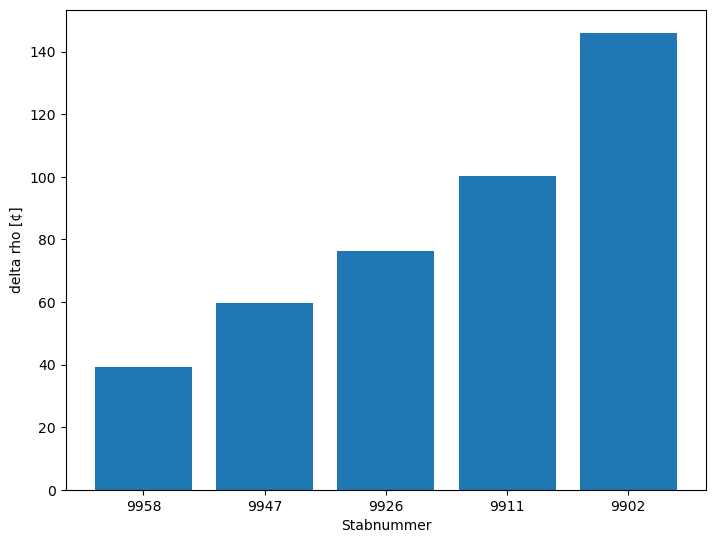

In [72]:
#annahme linear zw. 80 u 225 mm
import numpy as np
from scipy import stats

res = stats.linregress(stabstellung[7:14],reaktivitaet_sum[7:14])

slope = res.slope
intercept = res.intercept
rfact = res.rvalue
def linfit(X):
    return slope * X + intercept

print(linfit(133) -linfit(100))
print(linfit(150) -linfit(100))
print(linfit(164) -linfit(100))
print(linfit(184) -linfit(100))
print(linfit(222.5) -linfit(100))
bars = []
bars.append(linfit(133) -linfit(100))
bars.append(linfit(150) -linfit(100))
bars.append(linfit(164) -linfit(100))
bars.append(linfit(184) -linfit(100))
bars.append(linfit(222.5) -linfit(100))

elementnr = "9958","9947","9926","9911","9902"
39.35
59.62
76.32
100.17
146.08
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fig = plt.xlabel("Stabnummer")
fig = plt.ylabel("delta rho [¢]")
ax.bar(elementnr,bars)




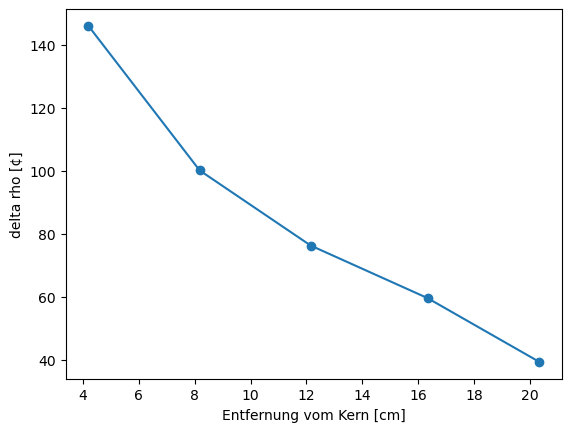

In [79]:
dist = [20.33,16.33,12.15,8.18,4.2]
bars.reverse()
plt.xlabel("Entfernung vom Kern [cm]")
plt.ylabel("delta rho [¢]")
plt.plot(dist,bars, "o-")

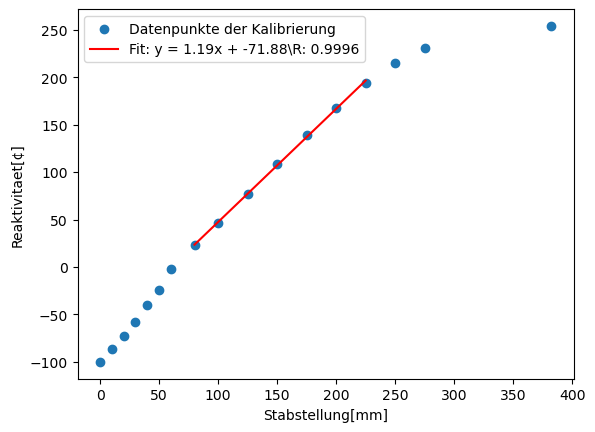

In [80]:
x = [80,225]
yfit = [slope * i + intercept for i in x]
plt.scatter(stabstellung,reaktivitaet_sum, label='Datenpunkte der Kalibrierung')
plt.plot(x, yfit , color='red', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}\R: {rfact:.4f}')
plt.legend()
plt.ylabel('Reaktivitaet[¢]')
plt.xlabel('Stabstellung[mm]')
plt.show()